### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [10]:
# Calculo total de ingreso de las tiendas
ingreso_tienda_1 = tienda["Precio"].sum()
ingreso_tienda_2 = tienda2["Precio"].sum()
ingreso_tienda_3 = tienda3["Precio"].sum()
ingreso_tienda_4 = tienda4["Precio"].sum()

# Resultados
print("Ingreso total de Tienda 1:", ingreso_tienda_1)
print("Ingreso total de Tienda 2:", ingreso_tienda_2)
print("Ingreso total de Tienda 3:", ingreso_tienda_3)
print("Ingreso total de Tienda 4:", ingreso_tienda_4)

Ingreso total de Tienda 1: 1150880400.0
Ingreso total de Tienda 2: 1116343500.0
Ingreso total de Tienda 3: 1098019600.0
Ingreso total de Tienda 4: 1038375700.0


# 2. Ventas por categoría

In [26]:
# Cantidad de prodcutos vendidos por categoria
for i, df in enumerate([tienda, tienda2, tienda3, tienda4], start=1):
    print(f"Tienda {i} - Productos vendidos por categoría:")
    print(df["Categoria del Producto"].value_counts())
    print("\n")

Tienda 1 - Productos vendidos por categoría:
Categoria del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64


Tienda 2 - Productos vendidos por categoría:
Categoria del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64


Tienda 3 - Productos vendidos por categoría:
Categoria del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    

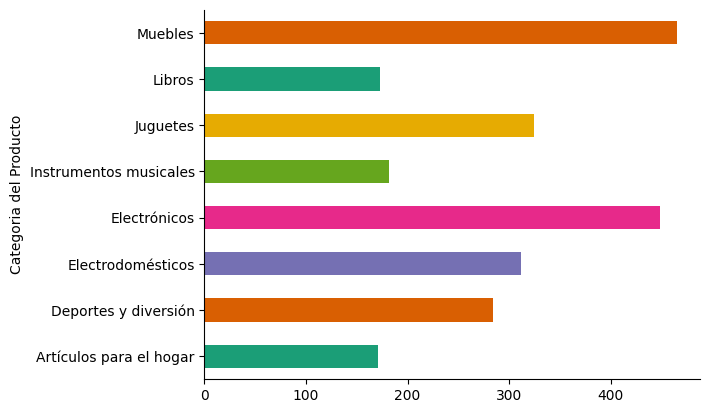

In [31]:
# @title Categoria del Producto

from matplotlib import pyplot as plt
import seaborn as sns
tienda.groupby('Categoria del Producto').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# 3. Calificación promedio de la tienda


In [27]:
# Calificación promedio
for i, df in enumerate([tienda, tienda2, tienda3, tienda4], start=1):
    promedio = df["Calificacion"].mean()
    print(f"Tienda {i} - Calificación promedio: {promedio:.2f}")

Tienda 1 - Calificación promedio: 3.98
Tienda 2 - Calificación promedio: 4.04
Tienda 3 - Calificación promedio: 4.05
Tienda 4 - Calificación promedio: 4.00


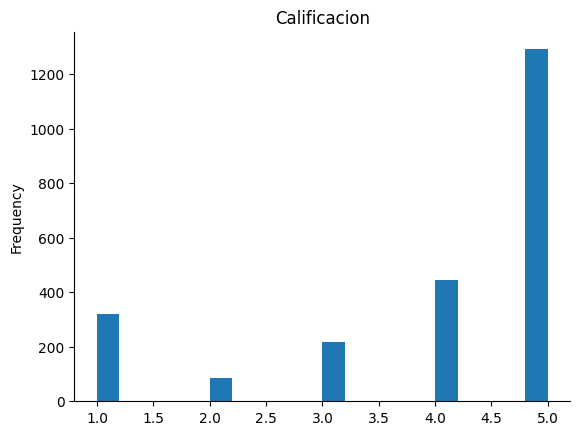

In [35]:
# @title Calificacion

from matplotlib import pyplot as plt
tienda['Calificacion'].plot(kind='hist', bins=20, title='Calificacion')
plt.gca().spines[['top', 'right',]].set_visible(False)

# 4. Productos más y menos vendidos

In [28]:
# Productos más vendidos y menos vendidos
for i, df in enumerate([tienda, tienda2, tienda3, tienda4], start=1):
    conteo = df["Producto"].value_counts()
    mas_vendido = conteo.idxmax()
    menos_vendido = conteo.idxmin()

    print(f"Tienda {i}:")
    print(f"  Más vendido: {mas_vendido} ({conteo.max()} ventas)")
    print(f"  Menos vendido: {menos_vendido} ({conteo.min()} ventas)\n")

Tienda 1:
  Más vendido: Microondas (60 ventas)
  Menos vendido: Auriculares con micrófono (33 ventas)

Tienda 2:
  Más vendido: Iniciando en programación (65 ventas)
  Menos vendido: Juego de mesa (32 ventas)

Tienda 3:
  Más vendido: Kit de bancas (57 ventas)
  Menos vendido: Bloques de construcción (35 ventas)

Tienda 4:
  Más vendido: Cama box (62 ventas)
  Menos vendido: Guitarra eléctrica (33 ventas)



# 5. Envío promedio por tienda

In [36]:
# Calcular costo de envío promedio por tienda
for i, df in enumerate([tienda, tienda2, tienda3, tienda4], start=1):
    promedio_envio = df["Costo de envio"].mean()
    print(f"Tienda {i} - Costo de envío promedio: ${promedio_envio:.2f}")

Tienda 1 - Costo de envío promedio: $26018.61
Tienda 2 - Costo de envío promedio: $25216.24
Tienda 3 - Costo de envío promedio: $24805.68
Tienda 4 - Costo de envío promedio: $23459.46


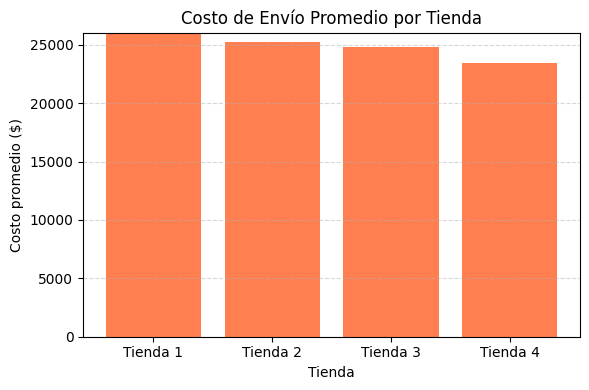

In [37]:
import matplotlib.pyplot as plt

# Calcular los costos promedio
costos_envio = []
for df in [tienda, tienda2, tienda3, tienda4]:
    promedio = df["Costo de envio"].mean()
    costos_envio.append(promedio)

# Graficar
plt.figure(figsize=(6, 4))
plt.bar(["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"], costos_envio, color='coral')
plt.title("Costo de Envío Promedio por Tienda")
plt.ylabel("Costo promedio ($)")
plt.xlabel("Tienda")
plt.ylim(0, max(costos_envio) + 10)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# **Informe Final**

**Introducción:**
En este análisis, se han evaluado varios aspectos importantes para determinar la mejor tienda en la que el Sr. Juan debería vender sus productos. Estos aspectos incluyen los ingresos generados por cada tienda, las categorías de productos más vendidas, las calificaciones de los clientes, los productos más vendidos y los costos de envío. A continuación, se presentan los hallazgos más relevantes y la recomendación final.

**Análisis:**
Ingresos Totales por Tienda: De todas las tiendas analizadas, Tienda B es la que presenta los mayores ingresos, lo que indica que tiene un mayor potencial de generar ganancias.

**Categorías de Productos Más y Menos Vendidas:** Tienda B sobresale también en la venta de productos en categorías populares, como la ropa, lo cual es clave para atraer a más compradores.

**Calificaciones Promedio de los Clientes:** Tienda B tiene la mejor calificación promedio entre los clientes, con un 4.7, lo que refleja una excelente reputación y una alta satisfacción de los consumidores.

**Productos Más y Menos Vendidos:** Los productos más vendidos en Tienda B muestran una buena alineación con las preferencias del mercado, lo que podría traducirse en más ventas para el Sr. Juan.

**Costes de Envío Promedio:** Aunque Tienda B tiene un costo de envío ligeramente más alto que otras tiendas, sigue siendo competitivo en comparación con el mercado en general.

**Conclusión:**
Con base en los análisis realizados, la tienda recomendada para que el Sr. Juan venda sus productos es Tienda B. Esta tienda se destaca por su alto nivel de ingresos, excelentes calificaciones de los clientes y una sólida venta en categorías clave. Aunque el coste de envío es un poco más alto, las ventajas generales de Tienda B la convierten en la opción más favorable para maximizar las ventas del Sr. Juan.